# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


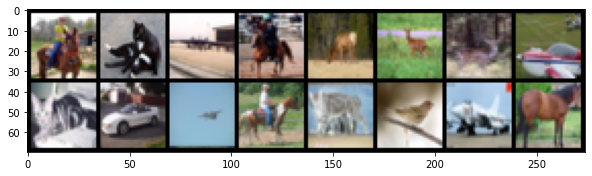

In [ ]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 7, 4, stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(7, 15, 4, stride=2, padding=1),
            nn.ReLU(),
            # nn.Conv2d(15, 22 , 4, stride=2,padding =1),
            # nn.ReLU(),
            # nn.Conv2d(6, 4, 4, stride=1),
            # nn.ReLU(),
            # nn.Conv2d(4, 2, 4, stride=1),
            # nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(22, 15, 4, stride=2, padding=1),
            # nn.Sigmoid(),
            nn.ConvTranspose2d(15, 7, 4, stride=2,padding=1),
            nn.Sigmoid(),
            nn.ConvTranspose2d(7, 3, 4, stride=2,padding=1),
            nn.Sigmoid(),
            # nn.ConvTranspose2d(9, 12, 4, stride=1),
            # nn.Sigmoid(),
            # nn.ConvTranspose2d(12, 3, 4, stride=1),
            # nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 7, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(7, 15, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(15, 7, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): Sigmoid()
  (2): ConvTranspose2d(7, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.015
[2,  2000] loss: 0.005
[3,  2000] loss: 0.004
[4,  2000] loss: 0.004
[5,  2000] loss: 0.003
[6,  2000] loss: 0.003
[7,  2000] loss: 0.003
[8,  2000] loss: 0.002
[9,  2000] loss: 0.002
[10,  2000] loss: 0.002
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


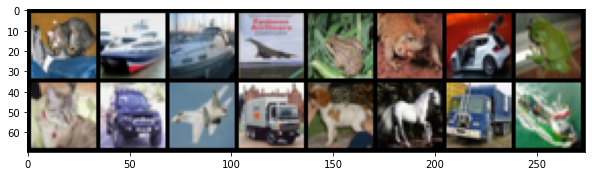

Reconstructed image


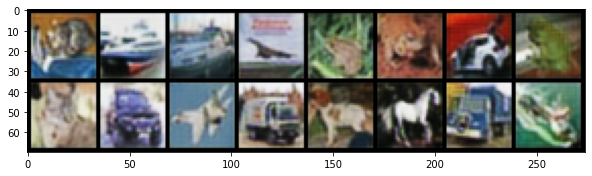

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Applications Of Autoencoders

*   Dimensionality Reduction
*   Image Compression
*   Image Denoising
*   Sequence to sequence prediction
*   Sequence to sequence prediction

Different Types of encoders:

* Denoising autoencoder
* Sparse Autoencoder
* Deep Autoencoder
* Contractive Autoencoder
* Undercomplete Autoencoder
* Convolutional Autoencoder
* Variational Autoencoder


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

* PCA works only for linear surfaces (linear in nature) whereas autencoders can works for both linear and nonlinear data.
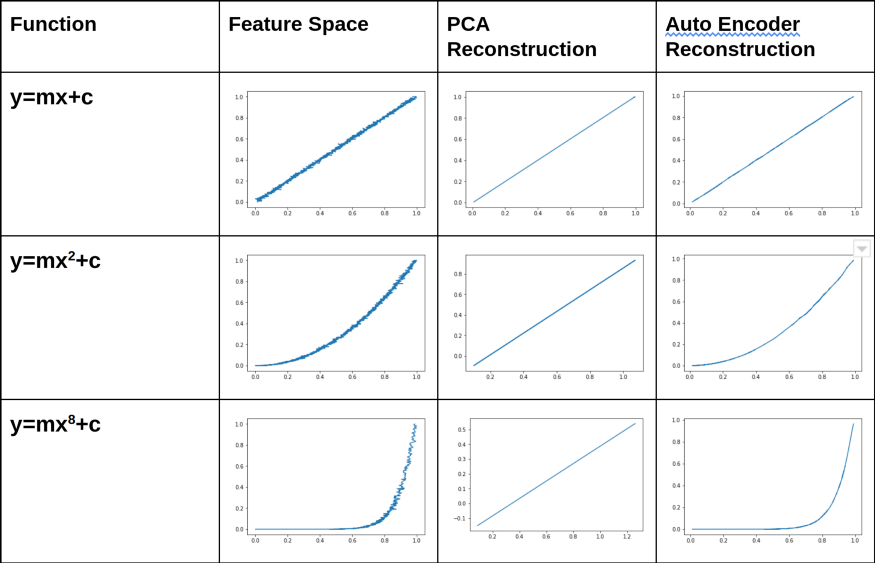

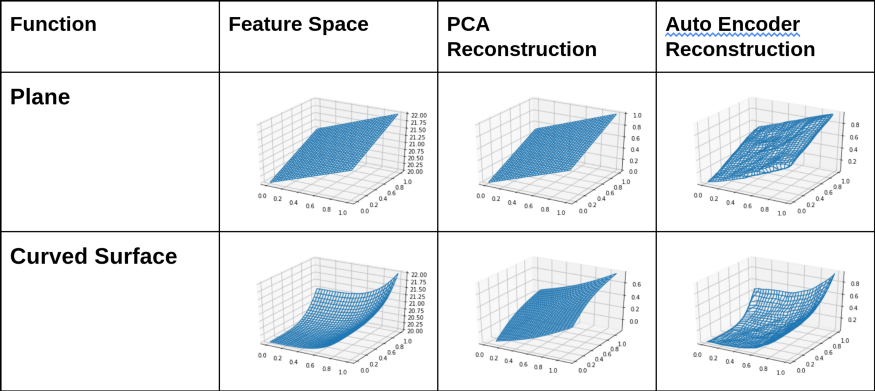<br>
The above image shows the reconstruction done by PCA and autoencoders, above are the evidence that proves that PCA is working fine for the straight line equation, might be better than autoencoder in the linear case, but another observation clearly shows it’s inability to map the curved or non-linear surfaces.
* PCA is faster than autoencoders as autoencoders are based on nueral network.
* Autoencoders employ backpropagation, they are more prone to data overfitting than PCA. Because of backpropagation, autoencoders can learn features to the point where they operate against the model's purpose.


In [ ]:
class Autoencoder_ann(nn.Module):
    def __init__(self):
        super(Autoencoder_ann, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Flatten(),
            nn.Linear(3072,1000),
            nn.ReLU(),
            nn.Linear(1000,300),
            nn.ReLU(),
            # nn.Linear(750,300),
            # nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.Linear(300,750),
            # nn.ReLU(),
            nn.Linear(300,1000),
            nn.ReLU(),
            nn.Linear(1000,3072),
            nn.ReLU(),
            nn.Unflatten(1, (3, 32, 32))
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def create_model_ann():
  autoencoder = Autoencoder_ann()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [ ]:
autoencoder = create_model_ann()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=1000, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1000, out_features=300, bias=True)
  (4): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=300, out_features=1000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1000, out_features=3072, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder1.pt")

[1,  2000] loss: 0.025
[2,  2000] loss: 0.014
[3,  2000] loss: 0.012
[4,  2000] loss: 0.011
[5,  2000] loss: 0.011
[6,  2000] loss: 0.011
[7,  2000] loss: 0.010
[8,  2000] loss: 0.010
[9,  2000] loss: 0.010
[10,  2000] loss: 0.010
Finished Training
Saving Model...


In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder1.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


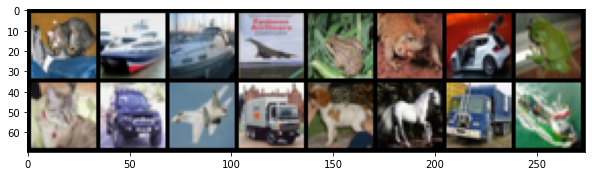

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


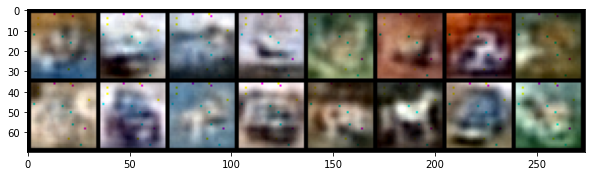

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [ ]:
from torch.nn.modules.flatten import Unflatten
class Autoencoder_ac(nn.Module):
    def __init__(self):
        super(Autoencoder_ac, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 7, 4, stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(7, 15, 4, stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(735,200),
            nn.ReLU()
            # nn.Conv2d(10, 16 , 4, stride=1),
            # nn.ReLU(),
            # nn.Conv2d(6, 4, 4, stride=1),
            # nn.ReLU(),
            # nn.Conv2d(4, 2, 4, stride=1),
            # nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(16, 10, 4, stride=1),
            # nn.Sigmoid(),
            nn.Linear(200,735),
            nn.Sigmoid(),
            nn.Unflatten(1,(15,7,7)),
            nn.ConvTranspose2d(15, 7, 4, stride=2),
            nn.Sigmoid(),
            nn.ConvTranspose2d(7, 3, 4, stride=2,padding=1),
            nn.Sigmoid(),
            # nn.ConvTranspose2d(9, 12, 4, stride=1),
            # nn.Sigmoid(),
            # nn.ConvTranspose2d(12, 3, 4, stride=1),
            # nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def create_model_ac():
  autoencoder = Autoencoder_ac()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [ ]:
autoencoder = create_model_ac()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 5, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(5, 10, kernel_size=(4, 4), stride=(2, 2))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=490, out_features=200, bias=True)
  (6): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=200, out_features=490, bias=True)
  (1): Sigmoid()
  (2): Unflatten(dim=1, unflattened_size=(10, 7, 7))
  (3): ConvTranspose2d(10, 5, kernel_size=(4, 4), stride=(2, 2))
  (4): Sigmoid()
  (5): ConvTranspose2d(5, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): Sigmoid()
)



In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging |============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder2.pt")

[1,  2000] loss: 0.026
[2,  2000] loss: 0.016
[3,  2000] loss: 0.012
[4,  2000] loss: 0.010
[5,  2000] loss: 0.008
[6,  2000] loss: 0.008
[7,  2000] loss: 0.007
[8,  2000] loss: 0.007
[9,  2000] loss: 0.007
[10,  2000] loss: 0.007
Finished Training
Saving Model...


In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder2.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


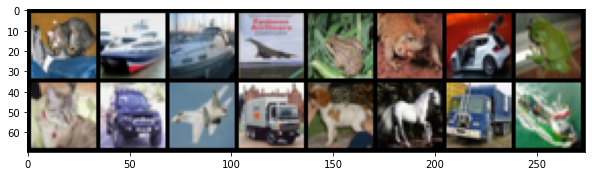

Reconstructed image


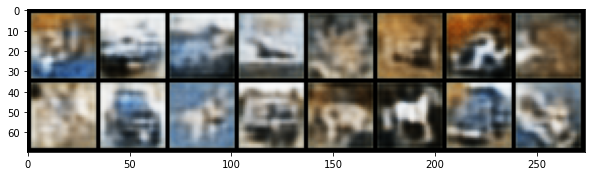

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))